## Samples

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = np.array([[8,12], [12,17],[20,20],

                 [25,10],[22,35],[81,65],

                [70,75],[55,65],[51,60],[85,93],])

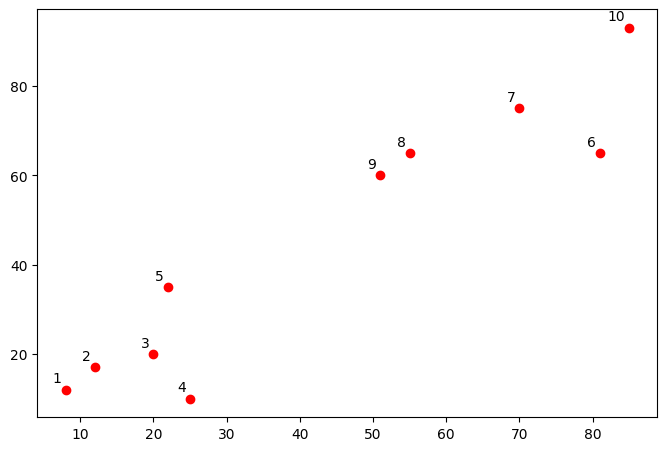

In [ ]:
points = range(1, 11)
plt.figure(figsize=(8, 6))
plt.subplots_adjust(bottom=0.2)
plt.scatter(data[:,0],data[:,1], label='True Position', color = 'r')
for point, x, y in zip(points, data[:, 0], data[:, 1]):
    plt.annotate(point, xy=(x, y), xytext=(-3, 3),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()

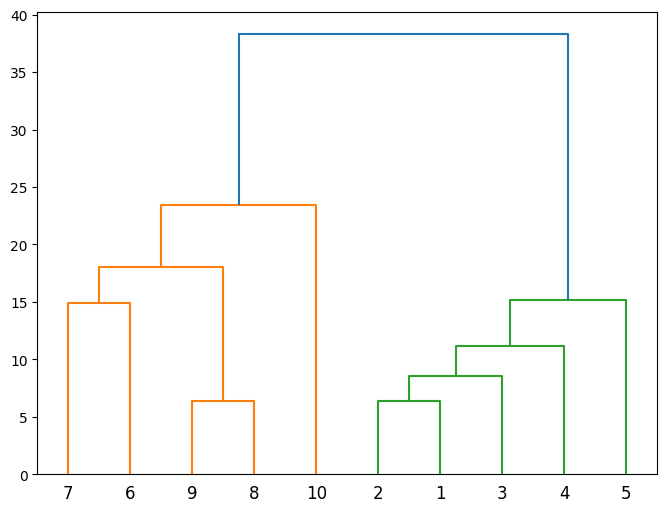

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

links = linkage(data, 'single')

points = range(1, 11)

plt.figure(figsize=(8, 6))

dendrogram(links, orientation='top', labels=points, distance_sort='descending',
           show_leaf_counts=True)

plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=2, metric='euclidean',
                                 linkage='single')

groups.fit_predict(data)


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

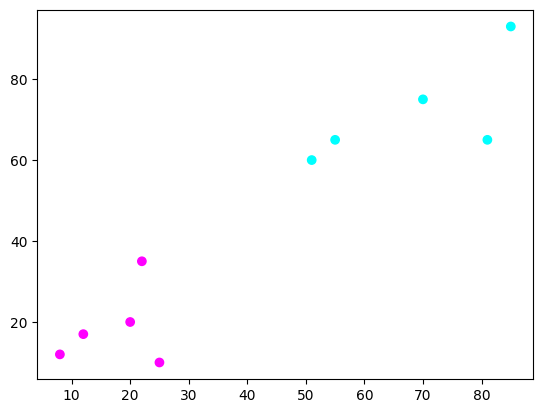

In [ ]:
plt.scatter(data[:,0],data[:,1], c=groups.labels_, cmap='cool')

In [ ]:
iris_data = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


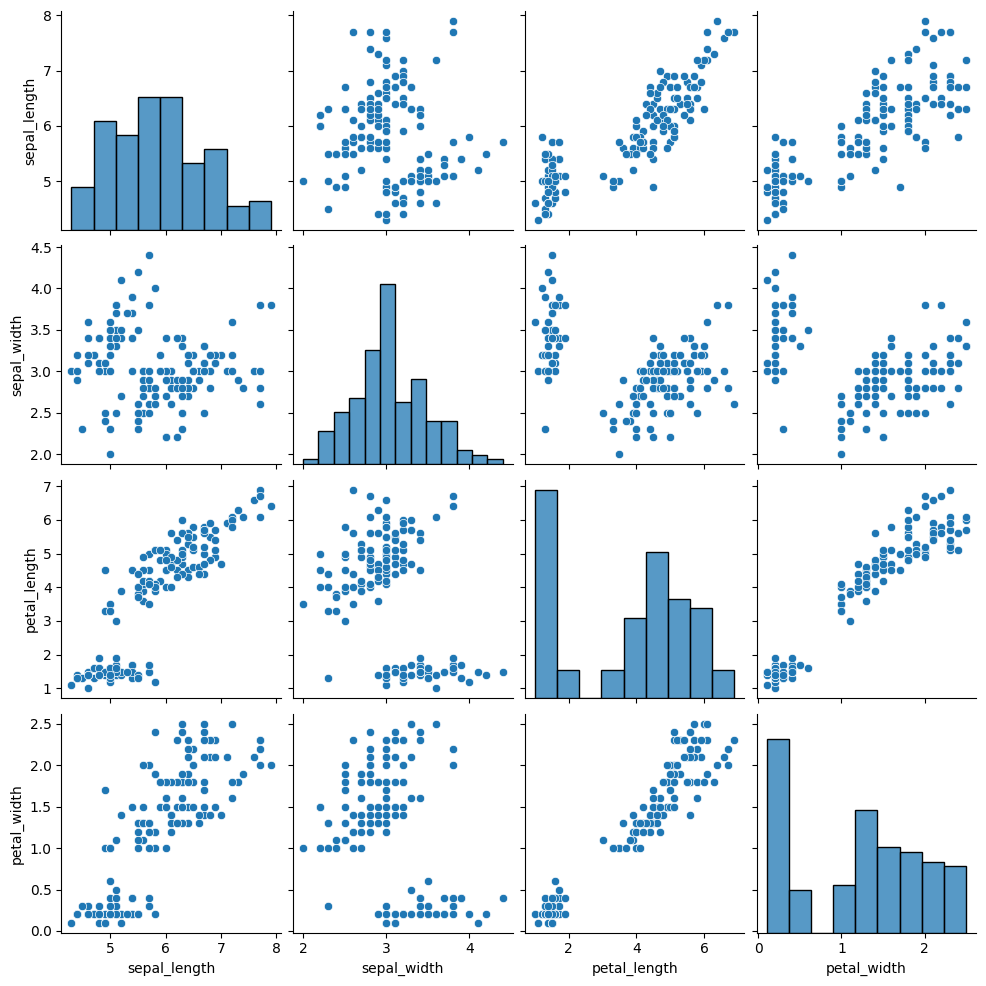

In [ ]:
iris_data.drop(['species'], axis=1, inplace = True)

import seaborn as sns

sns.pairplot(iris_data)


<Axes: xlabel='petal_length', ylabel='petal_width'>

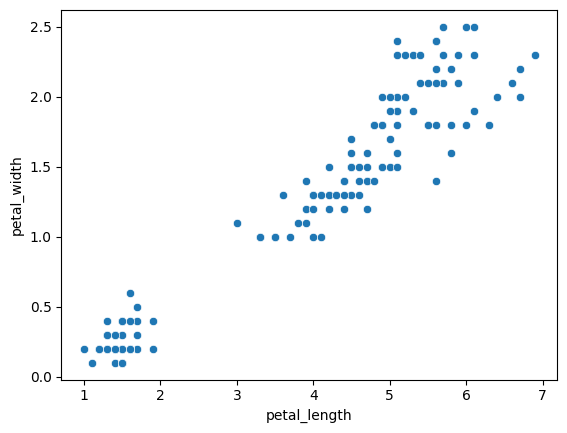

In [ ]:
iris_data = iris_data[['petal_length', 'petal_width']]
sns.scatterplot(x="petal_length", y="petal_width", data=iris_data)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=3, metric='euclidean',
                                 linkage='complete')

groups .fit_predict(iris_data)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

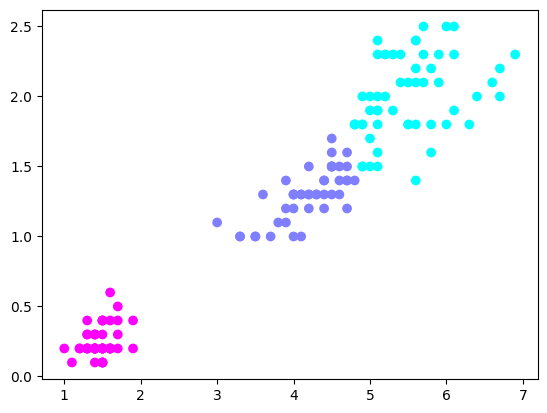

In [ ]:
plt.scatter(iris_data['petal_length'] ,iris_data['petal_width'],
            c= groups.labels_, cmap='cool')


## MNIST Dataset

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering

### Prepare Data

In [ ]:
RANDOM_STATE = 42

In [ ]:
digit = load_digits()

In [ ]:
X = digit.data
y = digit.target

In [ ]:
pca = PCA(n_components=2, random_state = RANDOM_STATE)
X_pca = pca.fit_transform(X)

print("=== PCA Transformation ===")
print(f"Original data: {X.shape[0]} samples, {X.shape[1]} features")
print(f"After PCA: {X_pca.shape[0]} samples, {X_pca.shape[1]} features")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")

# ใช้ข้อมูล PCA สำหรับ clustering
X = X_pca

=== PCA Transformation ===
Original data: 1797 samples, 64 features
After PCA: 1797 samples, 2 features
Explained variance ratio: [0.14890594 0.13618771]
Total variance explained: 0.285


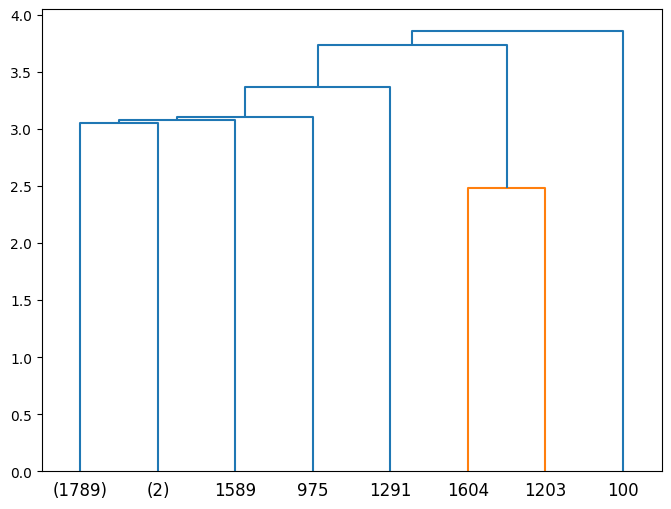

In [ ]:
links = linkage(X, 'single')

points = range(1, 1798)

plt.figure(figsize=(8, 6))

dendrogram(links, orientation='top', labels=points, distance_sort='descending',
           show_leaf_counts=True, truncate_mode = 'level', p =5)

plt.show()

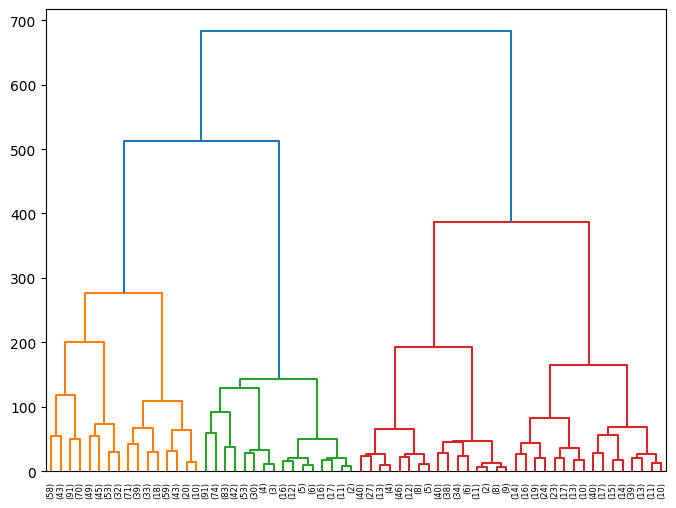

In [ ]:
links = linkage(X, 'ward')

points = range(1, 1798)

plt.figure(figsize=(8, 6))

dendrogram(links, orientation='top', labels=points, distance_sort='descending',
           show_leaf_counts=True, truncate_mode = 'level', p =5)

plt.show()

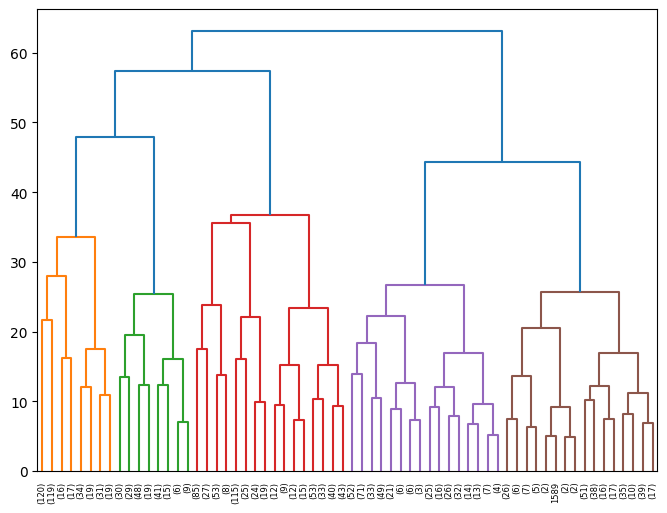

In [ ]:
links = linkage(X, 'complete')

points = range(1, 1798)

plt.figure(figsize=(8, 6))

dendrogram(links, orientation='top', labels=points, distance_sort='descending',
           show_leaf_counts=True, truncate_mode = 'level', p =5)

plt.show()

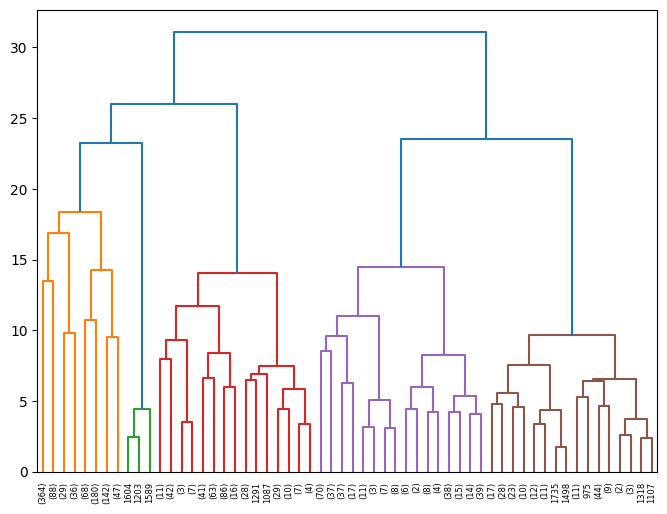

In [ ]:
links = linkage(X, 'average')

points = range(1, 1798)

plt.figure(figsize=(8, 6))

dendrogram(links, orientation='top', labels=points, distance_sort='descending',
           show_leaf_counts=True, truncate_mode = 'level', p =5)

plt.show()

### K = 10

In [ ]:
ten_groups = AgglomerativeClustering(n_clusters=10, metric='euclidean',
                                 linkage='complete')
label10 =ten_groups.fit_predict(X)

<Axes: >

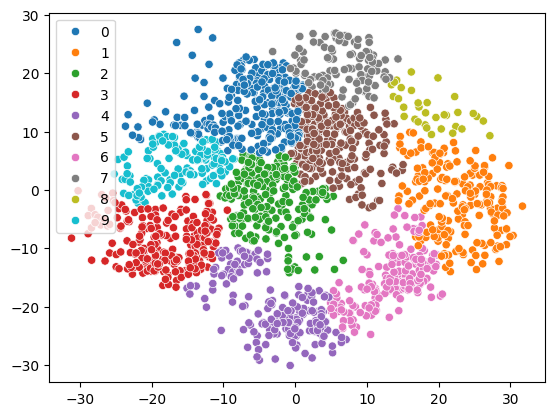

In [ ]:
sns.scatterplot(
    x=X[:,0],
    y=X[:,1],
    hue=label10, palette='tab10')